## Объявляем библиотеки

In [ ]:
import sys
import sklearn
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Xiaomi\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python38\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



     -------------------------------------- 455.9/455.9 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 2.4 MB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 1.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tenso

ModuleNotFoundError: No module named 'tensorflow.python'

## Скачиваем и визуализируем данные

In [ ]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

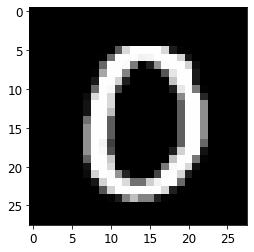

In [ ]:
plt.imshow(X_train[10], cmap='gray')
plt.show()

## Обучаем полносвязную нейронную сеть

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

2022-10-20 10:42:01.835823: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

2022-10-20 10:42:01.936147: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/5
1719/1719 [==============================] - 3s 1ms/step - loss: 1.0167 - accuracy: 0.7330 - val_loss: 0.2985 - val_accuracy: 0.9174
Epoch 2/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2995 - accuracy: 0.9153 - val_loss: 0.2354 - val_accuracy: 0.9338
Epoch 3/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2396 - accuracy: 0.9306 - val_loss: 0.2038 - val_accuracy: 0.9418
Epoch 4/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2054 - accuracy: 0.9408 - val_loss: 0.1789 - val_accuracy: 0.9504
Epoch 5/5
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1784 - accuracy: 0.9489 - val_loss: 0.1591 - val_accuracy: 0.9534


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 709us/step - loss: 0.1636 - accuracy: 0.9513


[0.163639634847641, 0.9513000249862671]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.95, 0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

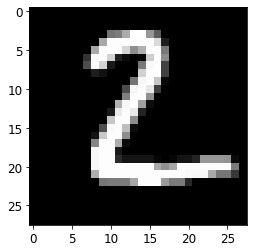

In [ ]:
plt.imshow(X_test[1], cmap='gray')
plt.show()

## Обучаем сверточную нейронную сеть

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
X_train.shape

(55000, 28, 28, 1)

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)

Epoch 1/5
1719/1719 [==============================] - 207s 120ms/step - loss: 0.6667 - accuracy: 0.7781 - val_loss: 0.0571 - val_accuracy: 0.9876
Epoch 2/5
1719/1719 [==============================] - 208s 121ms/step - loss: 0.1015 - accuracy: 0.9774 - val_loss: 0.0562 - val_accuracy: 0.9878
Epoch 3/5
1719/1719 [==============================] - 204s 118ms/step - loss: 0.0783 - accuracy: 0.9827 - val_loss: 0.0397 - val_accuracy: 0.9898
Epoch 4/5
1719/1719 [==============================] - 204s 119ms/step - loss: 0.0644 - accuracy: 0.9855 - val_loss: 0.0465 - val_accuracy: 0.9900
Epoch 5/5
313/313 [==============================] - 12s 40ms/step - loss: 0.0502 - accuracy: 0.9898


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 13s 40ms/step - loss: 0.0502 - accuracy: 0.9898


[0.05024703964591026, 0.989799976348877]

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

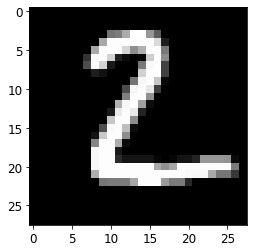

In [ ]:
plt.imshow(X_test[1].reshape(28,28), cmap='gray')
plt.show()

## Домашнее задание

Подобрать гиперпараметры сверточной нейронной сети и обучить ее для датасета CIFAR10 (keras.datasets.cifar10). Сравнить точность ее работы с полносвязной нейронной сетью. Лучше сделать в google colab и подключить использование GPU.

In [1]:
import sys
import sklearn
# !pip install tensorflow
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ParameterGrid
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
mnist = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
X_train_full.shape, y_train_full.shape

((50000, 32, 32, 3), (50000, 1))

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.
X_train.shape

(45000, 32, 32, 3)

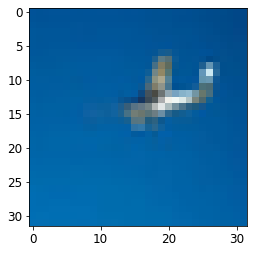

In [4]:
plt.imshow(X_train[10])
plt.show()

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

model.evaluate(X_test, y_test)

Epoch 1/5
1407/1407 [==============================] - 7s 3ms/step - loss: 1.8907 - accuracy: 0.3181 - val_loss: 1.8549 - val_accuracy: 0.3310
Epoch 2/5
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6992 - accuracy: 0.3965 - val_loss: 1.7353 - val_accuracy: 0.3834
Epoch 3/5
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6203 - accuracy: 0.4267 - val_loss: 1.6745 - val_accuracy: 0.3970
Epoch 4/5
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5678 - accuracy: 0.4458 - val_loss: 1.7331 - val_accuracy: 0.3734
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 1.5865 - accuracy: 0.4326


[1.586482286453247, 0.4325999915599823]

In [6]:
# airplane automobile bird cat deer dog frog horse ship truck
# 1           2         3   4   5    6    7    8     9   10
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2), y_test[0]

1/1 [==============================] - 0s 78ms/step


(array([[0.02, 0.06, 0.14, 0.39, 0.01, 0.21, 0.08, 0.01, 0.08, 0.01],
        [0.02, 0.41, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.3 , 0.26],
        [0.07, 0.15, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.63, 0.13]],
       dtype=float32), array([3], dtype=uint8))

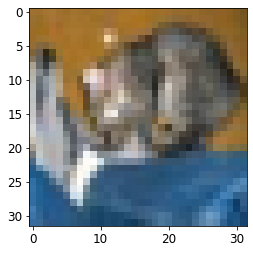

In [7]:
plt.imshow(X_test[0])
plt.show()

In [9]:
def grid_research(params):
  grid = ParameterGrid(params)
  loss = []
  for i in range(len(grid)):
    params_ = grid[i]
    print(i, params_)
    model = keras.models.Sequential()
    model.add(keras.Input(shape=X_train.shape[1:]))
    for _ in range(params_['n_layers_conv']-1):
      model.add(keras.layers.Conv2D(params_['n_neurons_conv'], (3, 3), activation=params_['activation']))
      model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(params_['n_neurons_conv'], (3, 3), activation=params_['activation']))
    model.add(keras.layers.Flatten())
    for _ in range(params_['n_layers_conv']):
      model.add(keras.layers.Dense(params_['n_neurons_conv'], activation=params_['activation']))
    model.add(keras.layers.Dense(10))
    print(model.summary)

    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=8, validation_data=(X_valid, y_valid), verbose=2)
    # tmp = np.mean(history.history['val_loss'][50:])
    tmp = np.min(history.history['val_loss'])
    loss.append([tmp, i, np.max(history.history['val_accuracy'])])
  
  loss = np.array(loss)
  # np.savetxt('loss.txt', loss)
  return loss
                        

In [7]:
params = {
    'n_layers_conv': [2,3],
    'n_neurons_conv': [32,64],
    # 'activation': ['relu']
    'activation': ['relu', 'sigmoid', 'softmax'],
}
# params = {'n_neurons_den': [64], 'n_neurons_conv': [32], 'n_layers_den': [2], 'n_layers_conv': [2], 'activation': ['relu']}

out = grid_research(params)

0 {'n_neurons_conv': 32, 'n_layers_conv': 2, 'activation': 'relu'}
<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f13800a5850>>
Epoch 1/8
1407/1407 - 13s - loss: 1.5275 - accuracy: 0.4416 - val_loss: 1.2494 - val_accuracy: 0.5512 - 13s/epoch - 10ms/step
Epoch 2/8
1407/1407 - 5s - loss: 1.1891 - accuracy: 0.5769 - val_loss: 1.1550 - val_accuracy: 0.5852 - 5s/epoch - 3ms/step
Epoch 3/8
1407/1407 - 5s - loss: 1.0426 - accuracy: 0.6310 - val_loss: 1.0477 - val_accuracy: 0.6342 - 5s/epoch - 3ms/step
Epoch 4/8
1407/1407 - 5s - loss: 0.9549 - accuracy: 0.6643 - val_loss: 1.0257 - val_accuracy: 0.6428 - 5s/epoch - 3ms/step
Epoch 5/8
1407/1407 - 5s - loss: 0.8884 - accuracy: 0.6905 - val_loss: 0.9722 - val_accuracy: 0.6690 - 5s/epoch - 3ms/step
Epoch 6/8
1407/1407 - 5s - loss: 0.8282 - accuracy: 0.7102 - val_loss: 0.9729 - val_accuracy: 0.6666 - 5s/epoch - 3ms/step
Epoch 7/8
1407/1407 - 5s - loss: 0.7755 - accuracy: 0.7282 - val_loss: 0.9806 - val_accuracy: 0.67

In [10]:
out

array([[0.97224814, 0.        , 0.67400002],
       [0.93090606, 0.        , 0.68540001],
       [0.98812723, 1.        , 0.65359998],
       [0.87577814, 1.        , 0.69739997],
       [2.30269575, 0.        , 0.1038    ],
       [2.30290246, 0.        , 0.104     ],
       [1.4826169 , 1.        , 0.46039999],
       [2.30262995, 1.        , 0.0996    ],
       [1.67432988, 0.        , 0.36939999],
       [1.68813181, 0.        , 0.3642    ],
       [2.30253935, 1.        , 0.104     ],
       [2.30265641, 1.        , 0.1038    ]])

In [14]:
# params_ = out[0]
# print(out)

params_ = {'n_neurons_conv': 64, 'n_layers_conv': 3, 'activation': 'relu'}

model = keras.models.Sequential()
model.add(keras.Input(shape=X_train.shape[1:]))
for _ in range(params_['n_layers_conv']-1):
  model.add(keras.layers.Conv2D(params_['n_neurons_conv'], (3, 3), activation=params_['activation']))
  model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(params_['n_neurons_conv'], (3, 3), activation=params_['activation']))
model.add(keras.layers.Flatten())
for _ in range(params_['n_layers_conv']):
  model.add(keras.layers.Dense(params_['n_neurons_conv'], activation=params_['activation']))
model.add(keras.layers.Dense(10))
# model.summary

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), verbose=2)

Epoch 1/15
1407/1407 - 7s - loss: 1.6173 - accuracy: 0.3998 - val_loss: 1.3284 - val_accuracy: 0.5304 - 7s/epoch - 5ms/step
Epoch 2/15
1407/1407 - 6s - loss: 1.2188 - accuracy: 0.5631 - val_loss: 1.2099 - val_accuracy: 0.5758 - 6s/epoch - 4ms/step
Epoch 3/15
1407/1407 - 6s - loss: 1.0459 - accuracy: 0.6320 - val_loss: 1.0210 - val_accuracy: 0.6440 - 6s/epoch - 4ms/step
Epoch 4/15
1407/1407 - 5s - loss: 0.9498 - accuracy: 0.6640 - val_loss: 0.9819 - val_accuracy: 0.6622 - 5s/epoch - 4ms/step
Epoch 5/15
1407/1407 - 6s - loss: 0.8727 - accuracy: 0.6933 - val_loss: 0.9472 - val_accuracy: 0.6798 - 6s/epoch - 4ms/step
Epoch 6/15
1407/1407 - 6s - loss: 0.8106 - accuracy: 0.7185 - val_loss: 0.8964 - val_accuracy: 0.6934 - 6s/epoch - 4ms/step
Epoch 7/15
1407/1407 - 6s - loss: 0.7641 - accuracy: 0.7315 - val_loss: 0.9069 - val_accuracy: 0.6930 - 6s/epoch - 4ms/step
Epoch 8/15
1407/1407 - 5s - loss: 0.7138 - accuracy: 0.7495 - val_loss: 0.8561 - val_accuracy: 0.7046 - 5s/epoch - 4ms/step
Epoch 9/

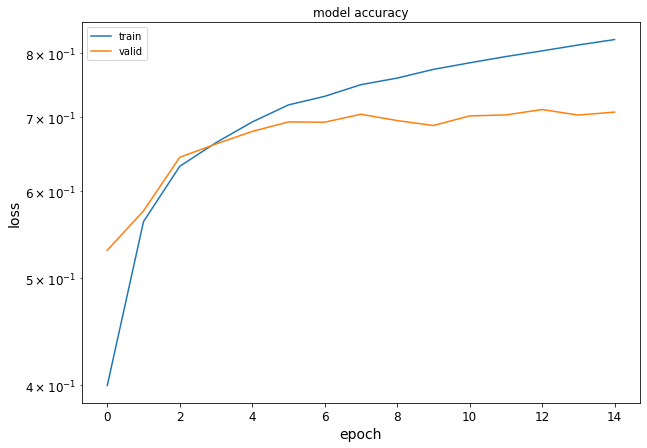

In [17]:
plt.figure(figsize=(10,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale('log')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

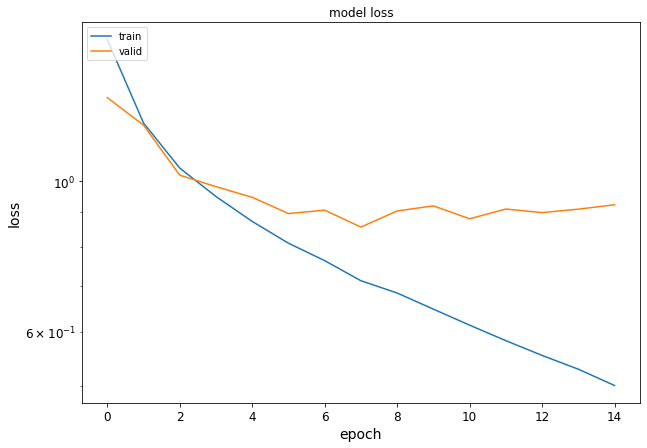

In [18]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale('log')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [19]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9669 - accuracy: 0.6999


[0.9669035077095032, 0.6998999714851379]

Получили 70% на тестовой выборке. Наилучшими параметрами в результате оказались {'n_neurons_conv': 64, 'n_layers_conv': 3, 'activation': 'relu'}. Для такого рода задач не подходят 'softmax' и 'sigmoid'. В результате экспериментов они не набирали и 50%. Полносвязная нейронная сеть плохо себя показала в такой задаче. Это может быть связано с большим кол-вом входных данных